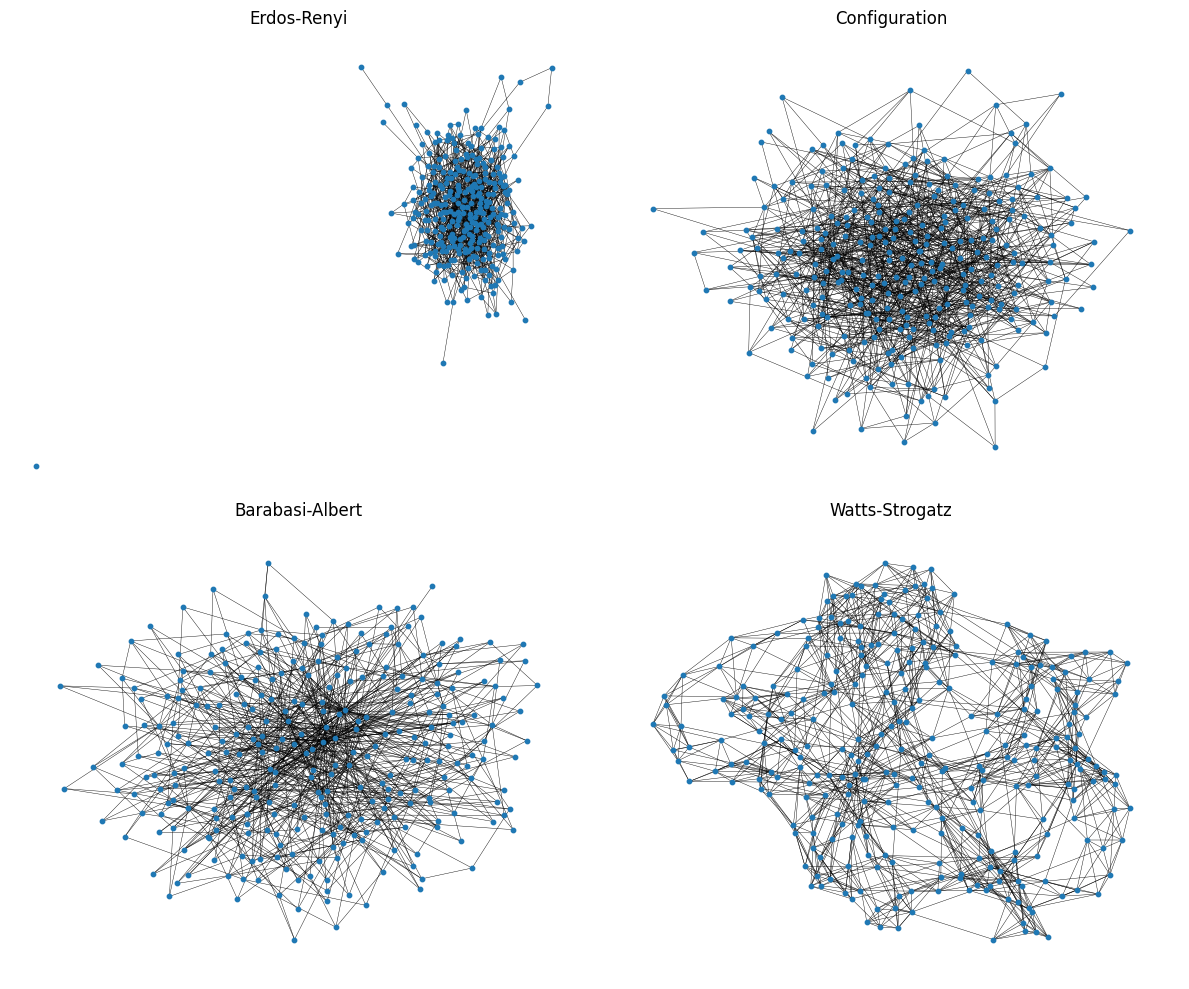

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 300
seed = 0

# 1) ER
G_er = nx.erdos_renyi_graph(N, 0.02, seed=seed)

# 2) Configuration
rng = np.random.default_rng(seed)
deg_seq = rng.poisson(8, N)
if deg_seq.sum() % 2 == 1:
    deg_seq[0] += 1
G_cfg = nx.Graph(nx.configuration_model(deg_seq, seed=seed))
G_cfg.remove_edges_from(nx.selfloop_edges(G_cfg))

# 3) BA (scale-free)
G_ba = nx.barabasi_albert_graph(N, 3, seed=seed)

# 4) WS (small-world)
G_ws = nx.watts_strogatz_graph(N, 8, 0.1, seed=seed)

graphs = [
    (G_er, "Erdos-Renyi"),
    (G_cfg, "Configuration"),
    (G_ba, "Barabasi-Albert"),
    (G_ws, "Watts-Strogatz")
]

plt.figure(figsize=(12, 10))

for i, (G, title) in enumerate(graphs):
    plt.subplot(2, 2, i+1)
    pos = nx.spring_layout(G, seed=seed)
    nx.draw(G, pos, node_size=10, width=0.3)
    plt.title(title)

plt.tight_layout()
plt.show()
